# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import DataFrame

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset_1 = pd.read_csv("../Lab 2/dataset_1.csv", sep=",", encoding="utf-8")
dataset_1.head()

,x,y,class
0,0.704023,0.020260,1
1,2.897694,1.691894,1
2,3.082691,4.391485,1
3,4.457473,1.078885,1
4,2.484003,0.736034,1


In [3]:
def train_models_and_build_report(dataframe: DataFrame, models: list[any]):
    X = dataframe[["x", "y"]].values
    Y = dataframe["class"].values

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    _, ax = plt.subplots(1, len(models), figsize=(15, 5))

    for i, model in enumerate(models):
        model.fit(x_train, y_train)

        predicted = model.predict(x_test)
        report = classification_report(y_test, predicted)

        DecisionBoundaryDisplay.from_estimator(
            model, X, 
            response_method="predict", 
            ax=ax[i],
            xlabel="x",
            ylabel="y",
            alpha=0.5,
        )

        ax[i].set_title(model.__class__.__name__)
        ax[i].scatter(x_test[:, 0], x_test[:, 1], c=predicted, edgecolor="k")


        incorrect = [i for i, v in enumerate(predicted) if v != y_test[i]]
        
        if len(incorrect) != 0:
            ax[i].scatter(
                x_test[incorrect, 0], 
                x_test[incorrect, 1], 
                c="red", 
                edgecolor="k", 
                marker="o", 
            )

        print(f"{model.__class__.__name__}: \n")
        print(report)


Для виконання цієї лабораторної роботи я створив єдиний метод для генерації репортів та графіків в залежності від обєктів моделей та датасету який ми передамо в нього. Мені здалось що в контексті цієї лабораторної важливіше проаналізувати як конкретна модель справляється з кожним датасетом ніж прописувати унікальне рішення для кожного датасету.

LogisticRegression: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

KNeighborsClassifier: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

RandomForestClassifier: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
we

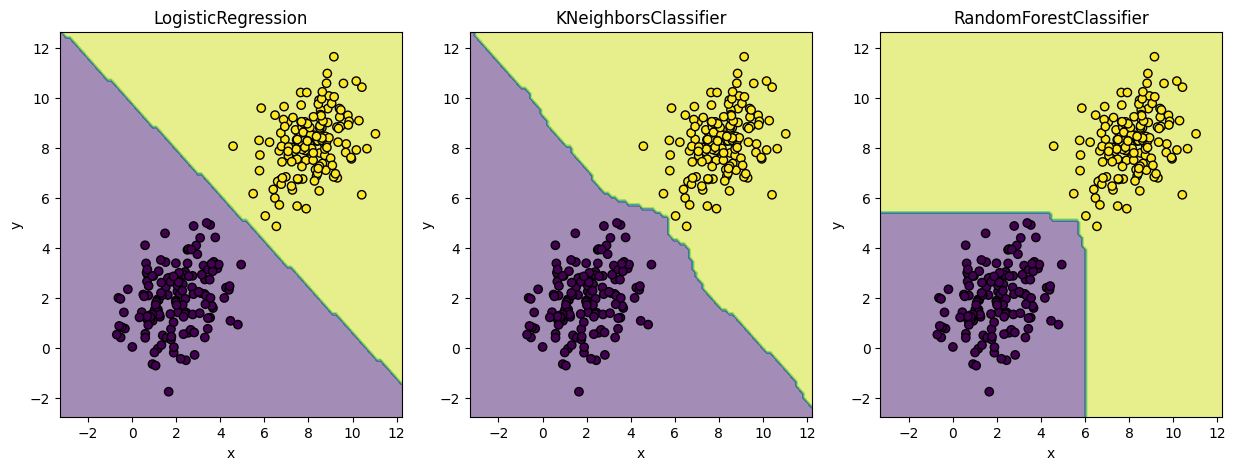

In [4]:
train_models_and_build_report(
    dataset_1,
    [
        LogisticRegression(), 
        KNeighborsClassifier(n_neighbors=5), 
        RandomForestClassifier(n_estimators=100, random_state=42),
    ]
)

**Аналіз отриманих результатів**:

У нашому випадку всі моделі дуже добре впорались з класифікацією точок у 100% випадках модель вірно класифікує точку. Основною причиною цього є те що дані в нашому датасеті є лінійно роздільними тому це доволі проста задача для обраних моделей. На графікаї можна побачити як саме кожна з моделей поділила класи.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [5]:
dataset_2 = pd.read_csv("../Lab 2/dataset_2.csv", sep=",", encoding="utf-8")
dataset_2.head()

,x,y,class
0,5.024911,2.428177,1
1,2.228902,2.332802,1
2,4.631129,2.376716,1
3,4.469195,0.911296,1
4,4.552236,3.187110,1


LogisticRegression: 

              precision    recall  f1-score   support

           1       0.98      0.99      0.98        83
           2       0.96      0.97      0.97       111
           3       0.96      0.93      0.95        76

    accuracy                           0.97       270
   macro avg       0.97      0.97      0.97       270
weighted avg       0.97      0.97      0.97       270

KNeighborsClassifier: 

              precision    recall  f1-score   support

           1       0.98      0.99      0.98        83
           2       0.96      0.96      0.96       111
           3       0.95      0.92      0.93        76

    accuracy                           0.96       270
   macro avg       0.96      0.96      0.96       270
weighted avg       0.96      0.96      0.96       270

RandomForestClassifier: 

              precision    recall  f1-score   support

           1       0.96      0.99      0.98        83
           2       0.96      0.97      0.96       111
   

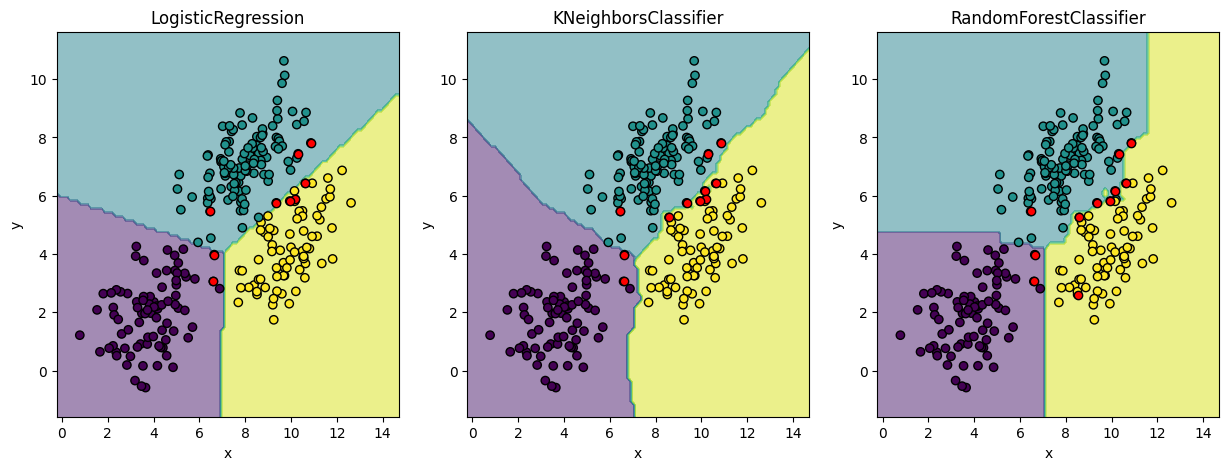

In [6]:
train_models_and_build_report(
    dataset_2,
    [
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=5), 
        RandomForestClassifier(n_estimators=100, random_state=42),
    ]
)

**Аналіз отриманих результатів**:

У цьому випадку ми вже маємо трішки складнішу ситуацію для наших моделей класи є нелінійно роздільними але незважаючи на це наші моделі впорались з завданням майже ідеально та доволі точно можуть класифікувати до якого класу належить точка проте є випадки які можна побачити на графіках у яких модель може помилитись але це доволі малий відсоток з всіх точок.

**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [7]:
dataset_3 = pd.read_csv("../Lab 2/dataset_3.csv", sep=",", encoding="utf-8")
dataset_3.head()

,x,y,class
0,4.204114,-2.398182,1
1,-4.109263,2.576153,1
2,1.115446,4.804043,1
3,5.244765,-1.453996,1
4,-4.808241,0.492058,1


LogisticRegression: 

              precision    recall  f1-score   support

           1       0.53      0.52      0.53       150
           2       0.53      0.55      0.54       150

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300

KNeighborsClassifier: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

RandomForestClassifier: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
we

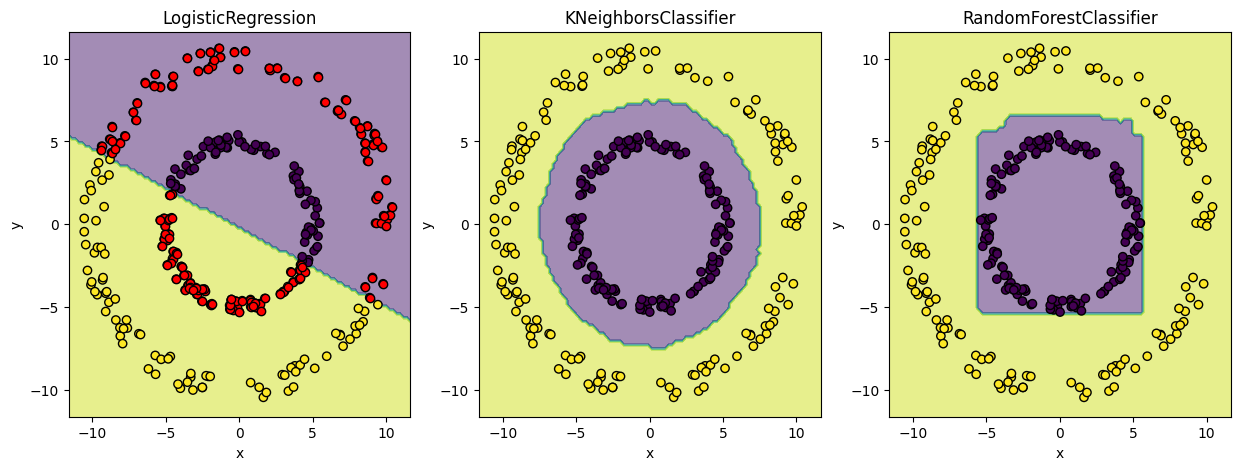

In [8]:
train_models_and_build_report(
    dataset_3,
    [
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=5), 
        RandomForestClassifier(n_estimators=200, random_state=42),
    ]
)

**Аналіз отриманих результатів**:

Цей датасет вже у рази складніший для розуміння модельками проте моделі `KNeighborsClassifier` та `RandomForestClassifier` впорались з ним показник успішної класифікацї 100%. Модель `LogisticRegression` я добавив для цього щоб показати наскільки вона недієва у випадках коли в нас подібні дані які неможливо розділити лінійно

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [9]:
dataset_4 = pd.read_csv("../Lab 2/dataset_4.csv", sep=",", encoding="utf-8")
dataset_4.head()

,x,y,class
0,0.155454,-0.000475,1
1,0.002420,-0.004910,1
2,0.071675,-0.393426,1
3,0.180958,0.273307,1
4,0.280618,-0.315559,1


LogisticRegression: 

              precision    recall  f1-score   support

           1       0.50      0.49      0.50       150
           2       0.50      0.51      0.51       150

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

KNeighborsClassifier: 

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       150
           2       0.99      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

RandomForestClassifier: 

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       150
           2       0.98      0.94      0.96       150

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
we

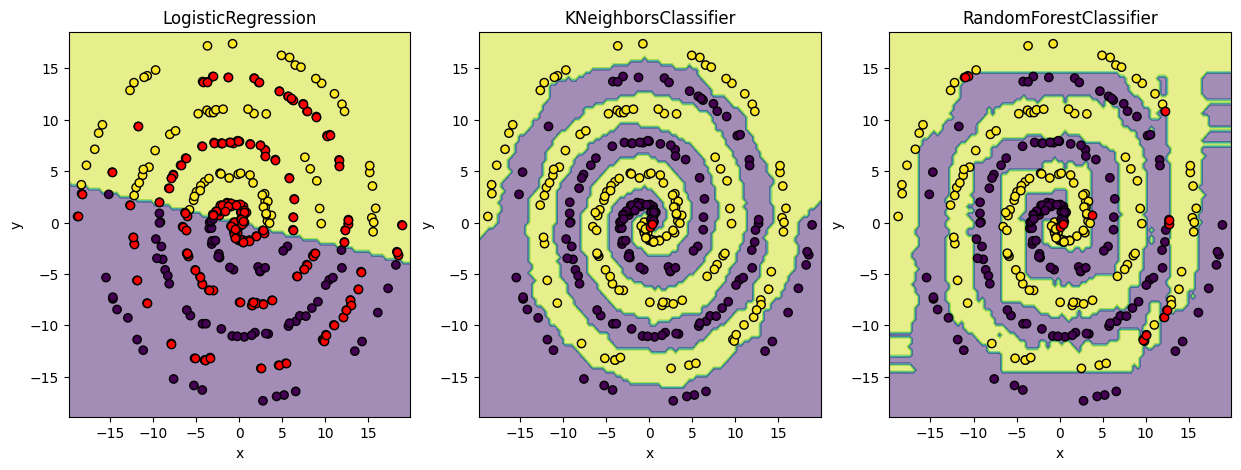

In [10]:
train_models_and_build_report(
    dataset_4,
    [
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=5), 
        RandomForestClassifier(n_estimators=100, random_state=42),
    ]
)

**Аналіз отриманих результатів**:

В останньому завданні в нас класи сформовані у вигляді спіралей які закручують одна одну що є доволі складним завданням для класифікації проте як можна побачити з показників і графіків моделі `KNeighborsClassifier` та `RandomForestClassifier` змогли доволі добре розпізнати межі класів але судячи з графіку `RandomForestClassifier` який є доволі нерівномірним та містить шуми, моделі доволі складно далась класифікація такого роду даних тому в нашому випадку нам ідеально підходить `KNeighborsClassifier`. Також як і в минулому датасеті модель `LogisticRegression` є абсолютно неефективною через свій прицип класифікації.